In [2]:
!pip install tensorflow==2.12 #installing the 2.12 version because google colab uses this version

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Un

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').disabled = True

In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from keras import preprocessing
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model
from keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from google.colab import files
import re, os

Importing the IMDB Dataset

In [3]:
num_words = 10000
maxlen = 150

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)


# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)
# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)


17464789/17464789 [==============================] - 0s 0us/step


Using an Embedded Layer to Classify the Dataset

In [4]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 8)            80000     
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model1.h5",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model

history = model.fit(train_texts, train_labels,
                    epochs=20,
                    batch_size=32,
                    validation_data=(val_texts, val_labels),
                    callbacks=callbacks)

Epoch 1/20
4/4 [==============================] - 1s 196ms/step - loss: 0.6961 - accuracy: 0.4700 - val_loss: 0.6935 - val_accuracy: 0.4943
Epoch 2/20
4/4 [==============================] - 0s 134ms/step - loss: 0.6727 - accuracy: 0.8300 - val_loss: 0.6935 - val_accuracy: 0.4979
Epoch 3/20
4/4 [==============================] - 0s 155ms/step - loss: 0.6571 - accuracy: 0.9700 - val_loss: 0.6933 - val_accuracy: 0.5016
Epoch 4/20
4/4 [==============================] - 1s 222ms/step - loss: 0.6430 - accuracy: 0.9900 - val_loss: 0.6933 - val_accuracy: 0.5028
Epoch 5/20
4/4 [==============================] - 1s 235ms/step - loss: 0.6297 - accuracy: 0.9900 - val_loss: 0.6932 - val_accuracy: 0.5031
Epoch 6/20
4/4 [==============================] - 1s 444ms/step - loss: 0.6167 - accuracy: 0.9900 - val_loss: 0.6932 - val_accuracy: 0.5037
Epoch 7/20
4/4 [==============================] - 1s 315ms/step - loss: 0.6034 - accuracy: 0.9900 - val_loss: 0.6932 - val_accuracy: 0.5038
Epoch 8/20
4/4 [====

Plot the Training and Validation Accuracy, Loss

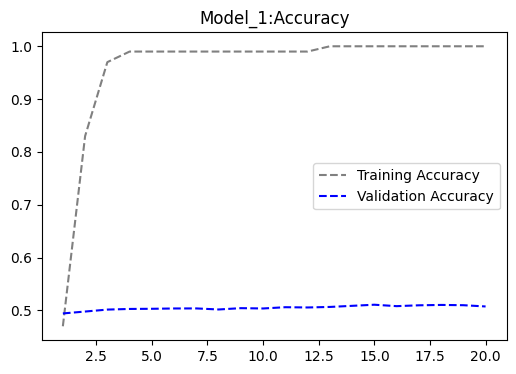

<Figure size 640x480 with 0 Axes>

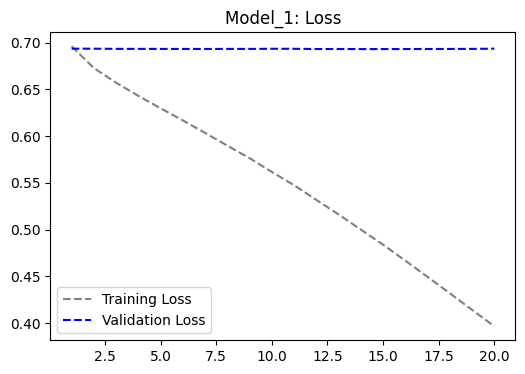

In [11]:
import matplotlib.pyplot as plt
!pip install matplotlib

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_1:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_1: Loss")
plt.legend()
plt.show()

In [12]:
test_model = load_model('model1.h5')
Model1_Results = test_model.evaluate(test_texts,test_labels)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

157/157 [==============================] - 1s 5ms/step - loss: 0.6930 - accuracy: 0.5110
Loss: 0.693
Accuracy: 0.511


GloVe, or Global Vectors for Word Representation, is an unsupervised learning algorithm for generating vector representations of words based on their co-occurrence statistics in large text corporation. We are getting the data from ai.stanford.edu.

In [18]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  8117k      0  0:00:10  0:00:10 --:--:-- 9128k


In [19]:
!rm -r aclImdb/train/unsup

Now use pretrained word embeddings

In [20]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
print('No. of Samples', len(texts))

No. of Samples 25000


Tokenizing the data

In [21]:
maxlen = 150  # cutting off reviews after 150 words
training_samples = 100  # training for 100 samples
validation_samples = 10000  # validating on 10000 samples
max_words = 10000  # considering the top 10,000 words in the dataset as given

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)[:5000]
y_test = np.asarray(labels)[:5000]

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


In [22]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2024-11-21 20:57:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-21 20:57:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-21 20:57:17--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

Now use the Glove Embedding and prepare the Glove word embedding matrix and define model

In [23]:
import numpy as np
path_to_glove_file = "glove.6B.100d.txt"


Found 400000 word vectors.


In [30]:
embedding_dim = 100

# Build index mapping words in the embeddings set
# to their embedding vector.
embeddings_index = {}
with open('glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

# Prepare embedding matrix
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",  # for multiclass use categorical_crossentropy
              metrics=["acc"])
history = model.fit(x_train, y_train,
                   epochs=15,
                   batch_size=32,
                   validation_data=(x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")

Found 400000 word vectors.
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_4 (Flatten)         (None, 15000)             0         
                                                                 
 dense_5 (Dense)             (None, 32)                480032    
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,480,065
Trainable params: 1,480,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
4/4 [==============================] - 4s 956ms/step - loss: 3.3317 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.4995
Epoch 2/15
4/4 [===

Plot the results

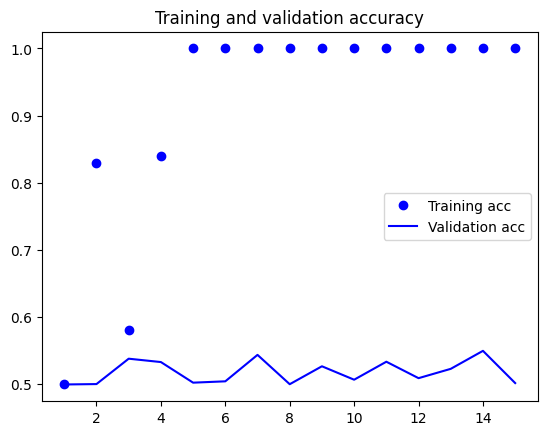

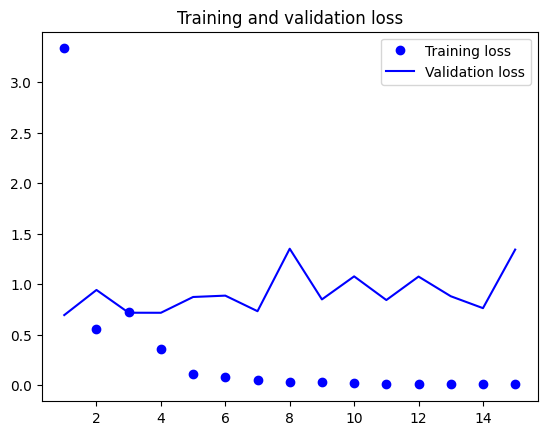

In [31]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()


Now consider a LSTM Example and prepare the IMDB Dataset

In [32]:
from keras.datasets import imdb
# from keras.preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences


max_features = 10000 # nr of words to consider as features CUTTING THIS DOWN TO 1000 FROM 10.000!!!
maxlen = 150 # cuts off the text after this nr of words among the most common words, i.e. 'max_features' CUT FROM 500 TO 100 !!!
batch_size = 32

print ("loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

input_train = input_train[:5000]
y_train = y_train[:5000]
input_test = input_test[:5000]
y_test = y_test[:5000]

print(len(input_train), "train sequences")
print(len(input_test), "test sequences")


print("Pad sequences (samples x time)")
input_train = pad_sequences(input_train, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

loading data ...
5000 train sequences
5000 test sequences
Pad sequences (samples x time)
input_train shape: (5000, 150)
input_test shape: (5000,)


In [33]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["acc"])
history = model.fit(input_train, y_train, epochs=15, batch_size=128, validation_split=0.2)

Epoch 1/15
32/32 [==============================] - 11s 224ms/step - loss: 0.6925 - acc: 0.5082 - val_loss: 0.6912 - val_acc: 0.5260
Epoch 2/15
32/32 [==============================] - 4s 114ms/step - loss: 0.6882 - acc: 0.5782 - val_loss: 0.6834 - val_acc: 0.5240
Epoch 3/15
32/32 [==============================] - 4s 114ms/step - loss: 0.6330 - acc: 0.6587 - val_loss: 0.5669 - val_acc: 0.7230
Epoch 4/15
32/32 [==============================] - 5s 148ms/step - loss: 0.5145 - acc: 0.7682 - val_loss: 0.5659 - val_acc: 0.7100
Epoch 5/15
32/32 [==============================] - 8s 250ms/step - loss: 0.4155 - acc: 0.8255 - val_loss: 0.5364 - val_acc: 0.7480
Epoch 6/15
32/32 [==============================] - 6s 170ms/step - loss: 0.3349 - acc: 0.8767 - val_loss: 0.4543 - val_acc: 0.7950
Epoch 7/15
32/32 [==============================] - 4s 113ms/step - loss: 0.2727 - acc: 0.9007 - val_loss: 0.4131 - val_acc: 0.8100
Epoch 8/15
32/32 [==============================] - 4s 113ms/step - loss: 0

LSTM Model has performed better even though smaller datasets is provided.

Now plot the results between loss and accuracy

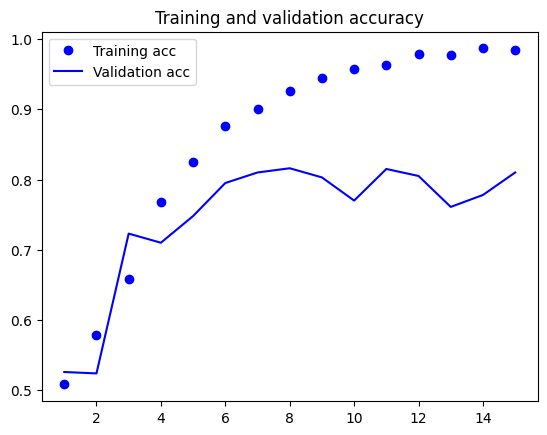

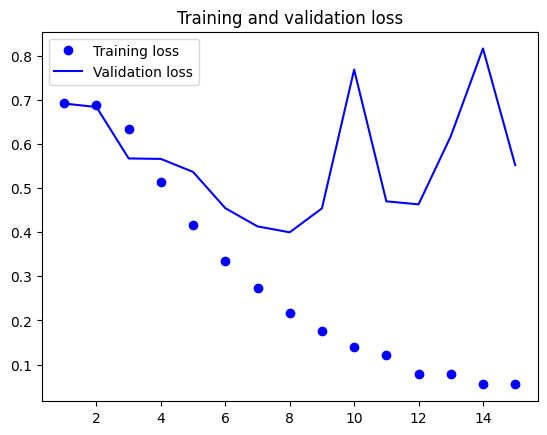

In [34]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()